In [2]:
#import libraries needed for this project
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import keras 
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [472]:
#loading the csv file
df = pd.read_csv('concrete_data.csv')

In [473]:
#printing the first five row of the dataset
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [474]:
# sns.pairplot(df)

In [475]:
#looking for correlations 
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


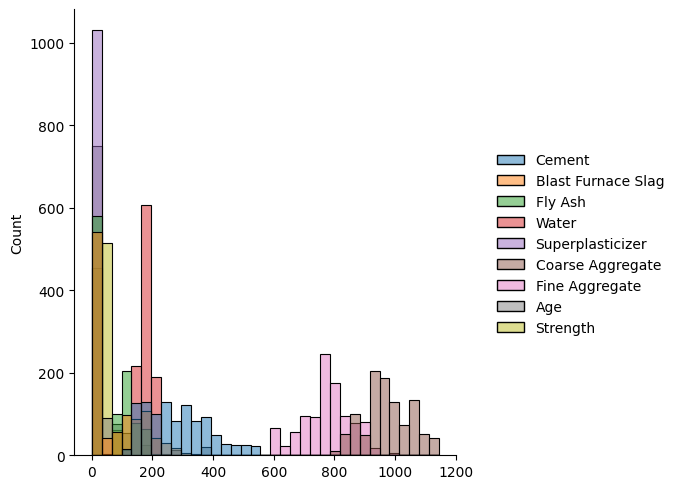

In [476]:
#distplot
sns.displot(df)

<Axes: ylabel='Density'>

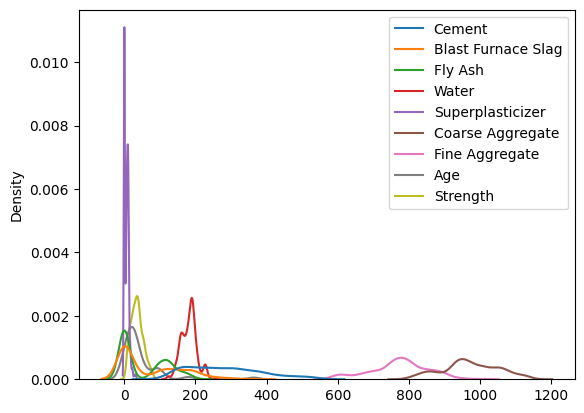

In [477]:
#kdeplot
sns.kdeplot(df)

In [480]:
df.dtypes

Cement                float64
Blast Furnace Slag    float64
Fly Ash               float64
Water                 float64
Superplasticizer      float64
Coarse Aggregate      float64
Fine Aggregate        float64
Age                     int64
Strength              float64
dtype: object

In [481]:
# Separating the feature variable and the target variable
x = df.iloc[: ,:-1]
y = df.iloc[: ,-1]

In [ ]:
# Normalizing the data using z-score
scaler  = StandardScaler()
x = scaler.fit_transform(x)

In [483]:
# splitting the data by train/test 
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=42)

In [484]:
# model building
model = Sequential()

model.add(Dense(units=32, kernel_initializer='he_normal', activation='relu', input_dim=8))

model.add(Dense(units=24, kernel_initializer='he_normal', activation='relu'))

model.add(Dense(units=1, activation='linear'))  

model.compile(optimizer='Adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

history = model.fit(X_train, y_train, validation_split=0.1, batch_size=10, epochs=500)  # Corrected 'Validation_split' to 'validation_split'

Epoch 1/500


/Users/pauljames/mmaction/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 30.4150 - mean_absolute_error: 30.4150 - val_loss: 24.7914 - val_mean_absolute_error: 24.7914
Epoch 2/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 22.0186 - mean_absolute_error: 22.0186 - val_loss: 14.4366 - val_mean_absolute_error: 14.4366
Epoch 3/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 13.9929 - mean_absolute_error: 13.9929 - val_loss: 12.1626 - val_mean_absolute_error: 12.1626
Epoch 4/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 12.3750 - mean_absolute_error: 12.3750 - val_loss: 11.4794 - val_mean_absolute_error: 11.4794
Epoch 5/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 11.9529 - mean_absolute_error: 11.9529 - val_loss: 11.0291 - val_mean_absolute_error: 11.0291
Epoch 6/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 11.4384 - mean_absolute_error: 11.4384 - val_loss: 10.7896 - val_mean_absolute_error: 10.7896
Epoch 7/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 11.2078 - mean_absolute

In [486]:
loss, mse = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test MAE: {mse}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 3.8415 - mean_absolute_error: 3.8415
Test Loss: 3.6592116355895996, Test MAE: 3.6592116355895996


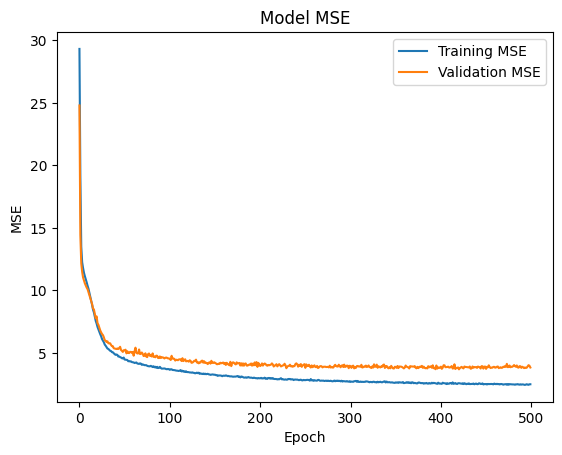

In [487]:
# Plot the results
plt.plot(history.history['mean_absolute_error'], label='Training MSE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MSE')
plt.title('Model MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [493]:
y_pred = model.predict(X_test)
print(f" The Model Accuracy is: {r2_score(y_test, y_pred)*100}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step
 The Model Accuracy is: 90.8215566021164


In [490]:
# # Save the model
# model.save('model.h5')